<a href="https://colab.research.google.com/github/dayaiit/Machine-Learning/blob/main/Bias_and_Variance_L5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Weather Temperature Prediction Models
--------------------------------------------------
Model 1 (High Bias): Linear model with day of year only
  Training RMSE: 7.21°C
  Test RMSE: 7.40°C
  Diagnosis: High bias - model is too simple to capture temperature patterns

Model 2 (Balanced): Polynomial degree 3 with day of year
  Training RMSE: 3.03°C
  Test RMSE: 3.12°C
  Diagnosis: Good balance - captures seasonal patterns without overfitting

Model 3 (High Variance): Polynomial degree 20 with day of year
  Training RMSE: 7.47°C
  Test RMSE: 6.83°C
  Diagnosis: High variance - overfits to training data

Model 4 (Enhanced): Polynomial degree 3 with all features (day, humidity, pressure)
  Training RMSE: 2.84°C
  Test RMSE: 3.19°C
  Diagnosis: Adding relevant features improves performance

Model 5 (Regularized): Ridge regression with polynomial degree 5, all features
  Training RMSE: 2.74°C
  Test RMSE: 3.02°C
  Diagnosis: Regularization helps prevent overfitting with complex models



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.20064e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


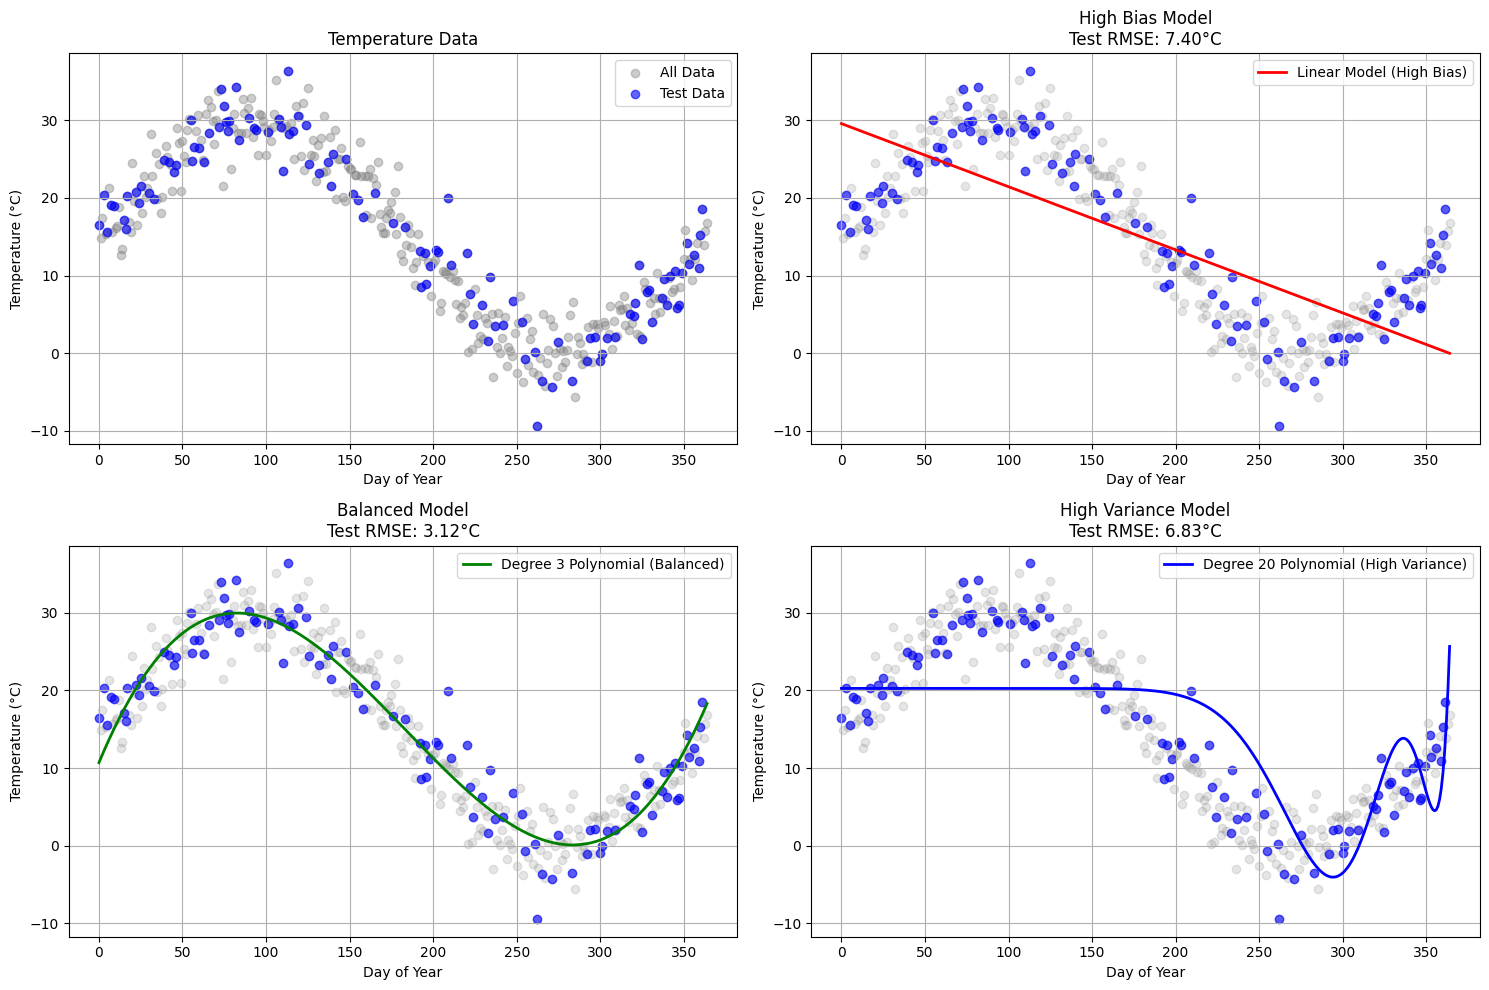


Try different weather prediction models:

High Bias Example (Linear model):


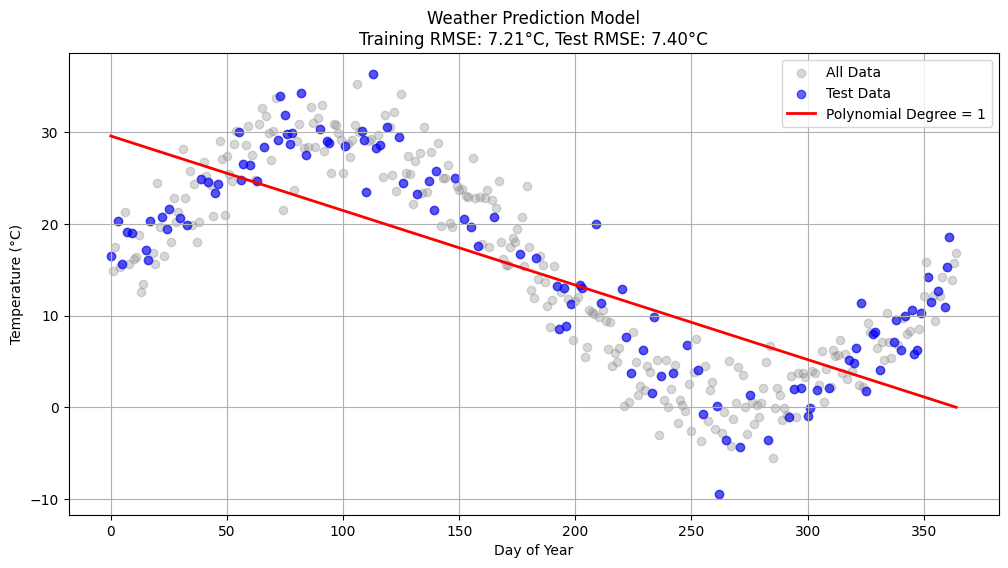

Training RMSE: 7.21°C
Test RMSE: 7.40°C

High Variance Example (High-degree polynomial):


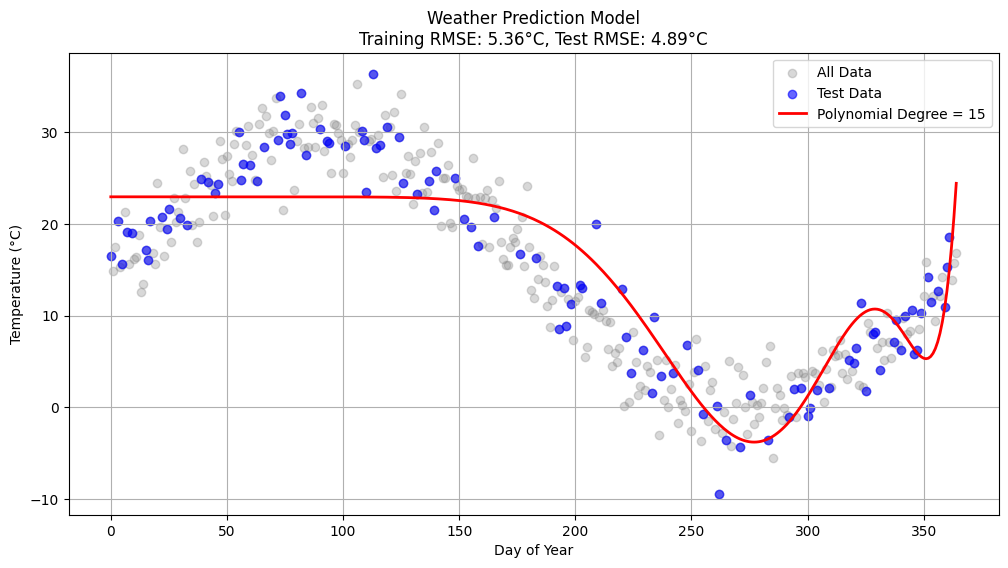

Training RMSE: 5.36°C
Test RMSE: 4.89°C

Balanced Model (Moderate polynomial):


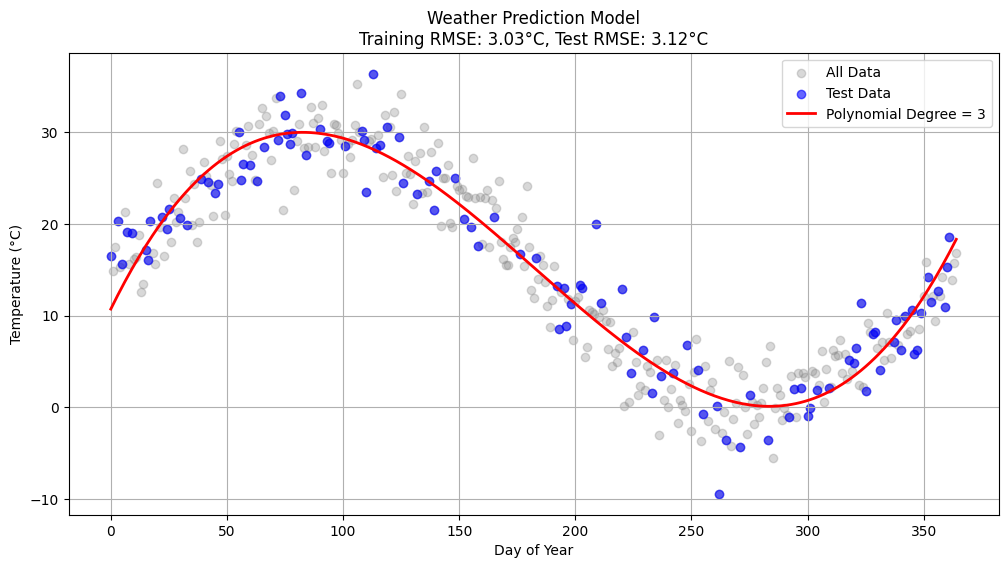

Training RMSE: 3.03°C
Test RMSE: 3.12°C

Model with All Features:


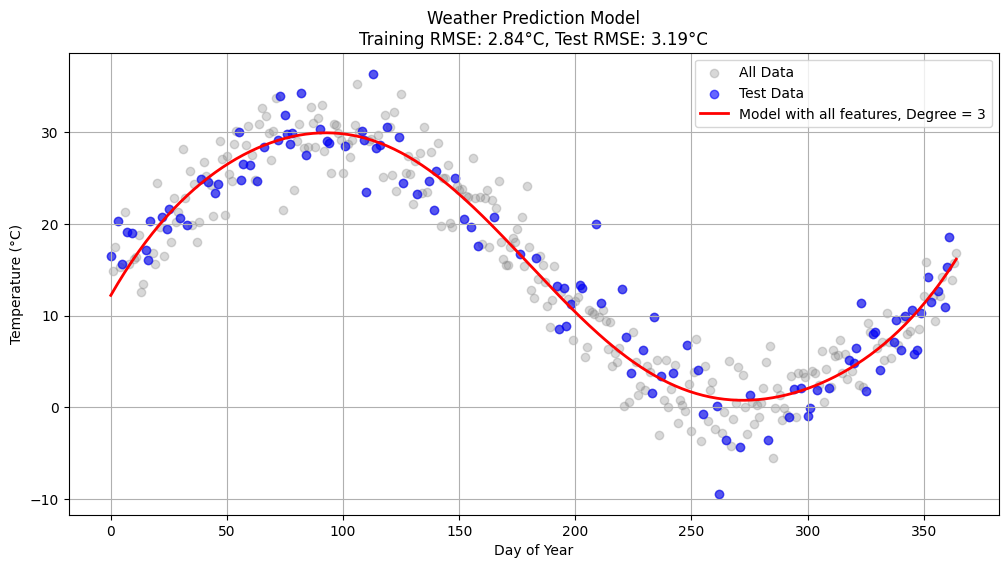

Training RMSE: 2.84°C
Test RMSE: 3.19°C

Regularized Model (Ridge Regression):


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.73334e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


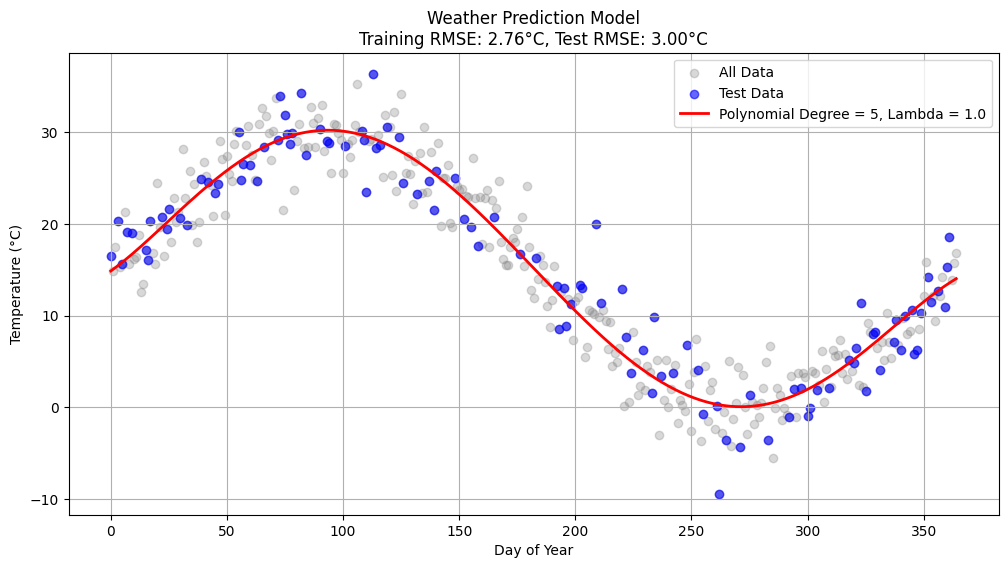

Training RMSE: 2.76°C
Test RMSE: 3.00°C


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Creating a synthetic weather dataset
np.random.seed(42)  # For reproducibility

# Let's simulate daily temperatures over a year with a seasonal pattern
days = np.arange(0, 365)
# Base temperature pattern: yearly cycle with some randomness
base_temp = 15 + 15 * np.sin(2 * np.pi * days / 365)  # Temperature ranges from 0°C to 30°C
noise = np.random.normal(0, 3, 365)  # Random daily fluctuations
temperatures = base_temp + noise

# Let's add some additional features that might be relevant
humidity = 60 + 20 * np.sin(2 * np.pi * days / 365 + 30) + np.random.normal(0, 10, 365)
pressure = 1013 + 10 * np.sin(2 * np.pi * days / 180) + np.random.normal(0, 3, 365)

# Create a feature matrix with the day of year as our primary feature
X = days.reshape(-1, 1)

# Add humidity and pressure as additional features
X_with_features = np.column_stack((days, humidity, pressure))

# Let's create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, temperatures, test_size=0.3, random_state=42)
X_train_features, X_test_features, _, _ = train_test_split(
    X_with_features, temperatures, test_size=0.3, random_state=42)

# Create a function to evaluate different temperature prediction models
def evaluate_temperature_model(model_type, degree=1, features='day_only', lambda_val=None):
    """
    Train a model to predict temperature and evaluate its performance.

    Parameters:
    model_type: Type of model ('linear' or 'ridge')
    degree: Polynomial degree for the day feature
    features: 'day_only' or 'all_features'
    lambda_val: Regularization strength (only for Ridge)

    Returns:
    train_error: Root mean squared error on training data (in °C)
    test_error: Root mean squared error on test data (in °C)
    model: The fitted model
    """
    # Choose appropriate feature set
    if features == 'day_only':
        X_train_use = X_train
        X_test_use = X_test
    else:  # 'all_features'
        X_train_use = X_train_features
        X_test_use = X_test_features

    # Create the model
    if model_type == 'linear':
        if degree == 1:
            # Simple linear regression
            model = LinearRegression()
            # Transform only if we're using polynomial features
            if features == 'day_only':
                model.fit(X_train_use, y_train)
            else:
                # For all features, we'll apply polynomial only to the day feature
                poly = PolynomialFeatures(degree=degree, include_bias=False)
                X_train_day_poly = poly.fit_transform(X_train_use[:, 0].reshape(-1, 1))
                X_train_combined = np.column_stack((X_train_day_poly, X_train_use[:, 1:]))
                model.fit(X_train_combined, y_train)
        else:
            # Polynomial regression
            if features == 'day_only':
                model = make_pipeline(
                    PolynomialFeatures(degree=degree, include_bias=True),
                    LinearRegression()
                )
                model.fit(X_train_use, y_train)
            else:
                # For all features, we'll apply polynomial only to the day feature
                poly = PolynomialFeatures(degree=degree, include_bias=False)
                X_train_day_poly = poly.fit_transform(X_train_use[:, 0].reshape(-1, 1))
                X_train_combined = np.column_stack((X_train_day_poly, X_train_use[:, 1:]))
                model = LinearRegression()
                model.fit(X_train_combined, y_train)

    elif model_type == 'ridge':
        if degree == 1:
            # Simple ridge regression
            model = Ridge(alpha=lambda_val)
            model.fit(X_train_use, y_train)
        else:
            # Polynomial ridge regression
            if features == 'day_only':
                model = make_pipeline(
                    PolynomialFeatures(degree=degree, include_bias=True),
                    Ridge(alpha=lambda_val)
                )
                model.fit(X_train_use, y_train)
            else:
                # For all features, we'll apply polynomial only to the day feature
                poly = PolynomialFeatures(degree=degree, include_bias=False)
                X_train_day_poly = poly.fit_transform(X_train_use[:, 0].reshape(-1, 1))
                X_train_combined = np.column_stack((X_train_day_poly, X_train_use[:, 1:]))
                model = Ridge(alpha=lambda_val)
                model.fit(X_train_combined, y_train)

    # Make predictions and calculate errors
    if features == 'day_only' or degree == 1:
        y_train_pred = model.predict(X_train_use)
        y_test_pred = model.predict(X_test_use)
    else:
        # We need to transform test data too for prediction
        X_test_day_poly = poly.transform(X_test_use[:, 0].reshape(-1, 1))
        X_test_combined = np.column_stack((X_test_day_poly, X_test_use[:, 1:]))
        y_train_pred = model.predict(X_train_combined)
        y_test_pred = model.predict(X_test_combined)

    train_error = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_error = np.sqrt(mean_squared_error(y_test, y_test_pred))

    return train_error, test_error, model

# Let's try different models to see bias-variance tradeoff
print("Weather Temperature Prediction Models")
print("-" * 50)

# Model 1: Linear model using only day of year (High Bias)
train_error_1, test_error_1, _ = evaluate_temperature_model('linear', degree=1, features='day_only')
print(f"Model 1 (High Bias): Linear model with day of year only")
print(f"  Training RMSE: {train_error_1:.2f}°C")
print(f"  Test RMSE: {test_error_1:.2f}°C")
print(f"  Diagnosis: High bias - model is too simple to capture temperature patterns\n")

# Model 2: Polynomial model with moderate degree (Balanced)
train_error_2, test_error_2, _ = evaluate_temperature_model('linear', degree=3, features='day_only')
print(f"Model 2 (Balanced): Polynomial degree 3 with day of year")
print(f"  Training RMSE: {train_error_2:.2f}°C")
print(f"  Test RMSE: {test_error_2:.2f}°C")
print(f"  Diagnosis: Good balance - captures seasonal patterns without overfitting\n")

# Model 3: High-degree polynomial model (High Variance)
train_error_3, test_error_3, _ = evaluate_temperature_model('linear', degree=20, features='day_only')
print(f"Model 3 (High Variance): Polynomial degree 20 with day of year")
print(f"  Training RMSE: {train_error_3:.2f}°C")
print(f"  Test RMSE: {test_error_3:.2f}°C")
print(f"  Diagnosis: High variance - overfits to training data\n")

# Model 4: Model with all available features (Better performance)
train_error_4, test_error_4, _ = evaluate_temperature_model('linear', degree=3, features='all_features')
print(f"Model 4 (Enhanced): Polynomial degree 3 with all features (day, humidity, pressure)")
print(f"  Training RMSE: {train_error_4:.2f}°C")
print(f"  Test RMSE: {test_error_4:.2f}°C")
print(f"  Diagnosis: Adding relevant features improves performance\n")

# Model 5: Regularized model (Ridge) with all features
train_error_5, test_error_5, _ = evaluate_temperature_model('ridge', degree=5, features='all_features', lambda_val=1.0)
print(f"Model 5 (Regularized): Ridge regression with polynomial degree 5, all features")
print(f"  Training RMSE: {train_error_5:.2f}°C")
print(f"  Test RMSE: {test_error_5:.2f}°C")
print(f"  Diagnosis: Regularization helps prevent overfitting with complex models\n")

# Let's visualize these models
plt.figure(figsize=(15, 10))

# Create sorted days for plotting
days_sorted = np.sort(days)
test_days = X_test[:, 0]
test_temps = y_test

# Fit models for visualization
# Model 1: Linear (High Bias)
_, _, model_1 = evaluate_temperature_model('linear', degree=1, features='day_only')
if hasattr(model_1, 'predict'):
    preds_1 = model_1.predict(days_sorted.reshape(-1, 1))
else:
    preds_1 = model_1.predict(days_sorted.reshape(-1, 1))

# Model 2: Polynomial degree 3 (Balanced)
_, _, model_2 = evaluate_temperature_model('linear', degree=3, features='day_only')
if hasattr(model_2, 'predict'):
    preds_2 = model_2.predict(days_sorted.reshape(-1, 1))
else:
    preds_2 = model_2.predict(days_sorted.reshape(-1, 1))

# Model 3: Polynomial degree 20 (High Variance)
_, _, model_3 = evaluate_temperature_model('linear', degree=20, features='day_only')
if hasattr(model_3, 'predict'):
    preds_3 = model_3.predict(days_sorted.reshape(-1, 1))
else:
    preds_3 = model_3.predict(days_sorted.reshape(-1, 1))

# Plot the actual data and model predictions
plt.subplot(2, 2, 1)
plt.scatter(days, temperatures, alpha=0.4, label='All Data', color='gray')
plt.scatter(test_days, test_temps, alpha=0.6, label='Test Data', color='blue')
plt.xlabel('Day of Year')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Data')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.scatter(days, temperatures, alpha=0.2, color='gray')
plt.plot(days_sorted, preds_1, 'r-', linewidth=2, label='Linear Model (High Bias)')
plt.scatter(test_days, test_temps, alpha=0.6, color='blue')
plt.xlabel('Day of Year')
plt.ylabel('Temperature (°C)')
plt.title(f'High Bias Model\nTest RMSE: {test_error_1:.2f}°C')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
plt.scatter(days, temperatures, alpha=0.2, color='gray')
plt.plot(days_sorted, preds_2, 'g-', linewidth=2, label='Degree 3 Polynomial (Balanced)')
plt.scatter(test_days, test_temps, alpha=0.6, color='blue')
plt.xlabel('Day of Year')
plt.ylabel('Temperature (°C)')
plt.title(f'Balanced Model\nTest RMSE: {test_error_2:.2f}°C')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.scatter(days, temperatures, alpha=0.2, color='gray')
plt.plot(days_sorted, preds_3, 'b-', linewidth=2, label='Degree 20 Polynomial (High Variance)')
plt.scatter(test_days, test_temps, alpha=0.6, color='blue')
plt.xlabel('Day of Year')
plt.ylabel('Temperature (°C)')
plt.title(f'High Variance Model\nTest RMSE: {test_error_3:.2f}°C')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Interactive function to experiment with different models
def try_weather_model(degree=3, features='day_only', lambda_val=None):
    """
    Try a weather prediction model with specified parameters
    and plot the results.
    """
    # Train the model
    train_error, test_error, model = evaluate_temperature_model(
        'ridge' if lambda_val is not None else 'linear',
        degree=degree,
        features=features,
        lambda_val=lambda_val
    )

    # Create a figure
    plt.figure(figsize=(12, 6))

    # Get predictions for all days to plot the curve
    if features == 'day_only':
        if hasattr(model, 'predict'):
            predictions = model.predict(days_sorted.reshape(-1, 1))
        else:
            predictions = model.predict(days_sorted.reshape(-1, 1))

        # Plot the data and the model
        plt.scatter(days, temperatures, alpha=0.3, label='All Data', color='gray')
        plt.scatter(test_days, test_temps, alpha=0.6, label='Test Data', color='blue')
        plt.plot(days_sorted, predictions, 'r-', linewidth=2,
                label=f'Polynomial Degree = {degree}' +
                (f', Lambda = {lambda_val}' if lambda_val is not None else ''))
    else:
        # For models with multiple features, we'll need to generate predictions differently
        # This is simplified and assumes we have humidity and pressure values for all days
        if degree == 1:
            all_features = np.column_stack((days_sorted,
                                        60 + 20 * np.sin(2 * np.pi * days_sorted / 365 + 30),
                                        1013 + 10 * np.sin(2 * np.pi * days_sorted / 180)))
            predictions = model.predict(all_features)
        else:
            # We need to transform the day feature for polynomial models
            poly = PolynomialFeatures(degree=degree, include_bias=False)
            days_poly = poly.fit_transform(days_sorted.reshape(-1, 1))
            humidity_values = 60 + 20 * np.sin(2 * np.pi * days_sorted / 365 + 30)
            pressure_values = 1013 + 10 * np.sin(2 * np.pi * days_sorted / 180)
            all_features = np.column_stack((days_poly, humidity_values, pressure_values))
            predictions = model.predict(all_features)

        # Plot the data and the model
        plt.scatter(days, temperatures, alpha=0.3, label='All Data', color='gray')
        plt.scatter(test_days, test_temps, alpha=0.6, label='Test Data', color='blue')
        plt.plot(days_sorted, predictions, 'r-', linewidth=2,
                label=f'Model with all features, Degree = {degree}' +
                (f', Lambda = {lambda_val}' if lambda_val is not None else ''))

    plt.xlabel('Day of Year')
    plt.ylabel('Temperature (°C)')
    plt.title(f'Weather Prediction Model\nTraining RMSE: {train_error:.2f}°C, Test RMSE: {test_error:.2f}°C')
    plt.legend()
    plt.grid(True)
    plt.show()

    return train_error, test_error

# Examples of how to use the interactive function:
print("\nTry different weather prediction models:")

# 1. High Bias Example
print("\nHigh Bias Example (Linear model):")
train_error, test_error = try_weather_model(degree=1)
print(f"Training RMSE: {train_error:.2f}°C")
print(f"Test RMSE: {test_error:.2f}°C")

# 2. High Variance Example
print("\nHigh Variance Example (High-degree polynomial):")
train_error, test_error = try_weather_model(degree=15)
print(f"Training RMSE: {train_error:.2f}°C")
print(f"Test RMSE: {test_error:.2f}°C")

# 3. Balanced Model
print("\nBalanced Model (Moderate polynomial):")
train_error, test_error = try_weather_model(degree=3)
print(f"Training RMSE: {train_error:.2f}°C")
print(f"Test RMSE: {test_error:.2f}°C")

# 4. Model with additional features
print("\nModel with All Features:")
train_error, test_error = try_weather_model(degree=3, features='all_features')
print(f"Training RMSE: {train_error:.2f}°C")
print(f"Test RMSE: {test_error:.2f}°C")

# 5. Regularized model
print("\nRegularized Model (Ridge Regression):")
train_error, test_error = try_weather_model(degree=5, lambda_val=1.0)
print(f"Training RMSE: {train_error:.2f}°C")
print(f"Test RMSE: {test_error:.2f}°C")

# Try your own values by calling:
# try_weather_model(degree=..., features='day_only' or 'all_features', lambda_val=...)